# PX079:  DTI maps to hippocampal surfaces and smoothing parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, include:
%matplotlib inline
import os
import glob
import pandas as pd
import numpy as np
import nibabel as nib
from nibabel.freesurfer.mghformat import load
from brainspace.datasets import load_conte69
from brainspace.datasets import load_mask
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.plotting.surface_plotting import build_plotter
from brainstat.stats.terms import MixedEffect
from brainstat.stats.terms import FixedEffect
from brainstat.stats.SLM import SLM

In [35]:
# -----------------------------------------------------------------------------
# Load conte69
c69_lh, c69_rh = load_conte69()
mask = load_mask(join=True)

# Load the inflated surface
surf_inflated_dir = '/host/percy/local_raid/ke/toolbox/micasoft/parcellations/fs_LR-conte69/ColeAnticevic/'

# Load native mid surface
inf_lh = read_surface(surf_inflated_dir+'S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii', itype='gii')
inf_rh = read_surface(surf_inflated_dir+'S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii', itype='gii')


def plot_4surfs(surfaces, values, filename='~/surface.png', views = ['ventralRL', 'dorsal', 'dorsal', 'ventralLR'],
                array_names = ['surf1', 'surf2', 'surf3', 'surf4'],
                Color_range=(0, 2), Cmap="inferno", save=False, title='hippocampus'):
    
    # Append values o surfaces
    for i, value in enumerate(surfaces):
        surfaces[i].append_array(values[i], name=array_names[i])
    # Surfaces
    my_surfs = {'s1': surfaces[0], 's2': surfaces[1], 's3': surfaces[2], 's4': surfaces[3]}

    # Set the layout 1x4
    layout = [['s1', 's2', 's3', 's4']]
    
    #or if you want different views for each surface: views = ['dorsal', 'dorsal', 'dorsal', 'dorsal']
    p = build_plotter(my_surfs, layout, array_name=array_names, view=views, zoom=2, size=(800, 400),
                      color_bar='right', share='row', color_range=Color_range, cmap=Cmap, nan_color=(0, 0, 0, 1), 
                      label_text=[title])

    return p.show(interactive=False, embed_nb=True)

# -----------------------------------------------------------------------------
# Load the cannonical surfaces    
hippunfold_resources='/host/yeatman/local_raid/rcruces/git_here/hippunfold_toolbox/resources/'
hipp_mid_r=read_surface(hippunfold_resources + 'canonical_surfs/tpl-avg_space-canonical_den-0p5mm_label-hipp_midthickness.surf.gii', itype='gii')
hipp_unf_r=read_surface(hippunfold_resources + 'unfold_template_hipp/tpl-avg_space-unfold_den-0p5mm_midthickness.surf.gii', itype='gii')

hipp_mid_l=read_surface(hippunfold_resources + 'canonical_surfs/tpl-avg_space-canonical_den-0p5mm_label-hipp_midthickness.surf.gii', itype='gii')
hipp_unf_l=read_surface(hippunfold_resources + 'unfold_template_hipp/tpl-avg_space-unfold_den-0p5mm_midthickness.surf.gii', itype='gii')

vflip = np.ones(hipp_mid_l.Points.shape)
vflip[:,0] = -1
hipp_mid_l.Points=hipp_mid_l.Points*vflip
hipp_unf_l.Points=hipp_unf_l.Points*vflip


# -------------------------------------------------------------------
# Hippocampal plotting
ID='sub-PX079_ses-01'

def plot_hipp(surf_dir='surfaces', dti='FA', Title='', Range=(0.1, 0.23),
              Views=['flatL', 'dorsal', 'dorsal', 'flatR'], smt='_10mm'):
    workdir='/data_/mica3/BIDS_MICs/derivatives/micapipe/sub-PX079/ses-01/dwi/'
    file_lh=workdir+surf_dir+'/'+ID+'_hemi-lh_space-dwi_desc-dwi-'+dti+'_den-0p5mm_label-hipp_midthickness'+smt+'.func.gii'
    file_rh=workdir+surf_dir+'/'+ID+'_hemi-rh_space-dwi_desc-dwi-'+dti+'_den-0p5mm_label-hipp_midthickness'+smt+'.func.gii'
    DTI_lh=nib.load(file_lh).darrays[0].data
    DTI_rh=nib.load(file_rh).darrays[0].data

    p= plot_4surfs(surfaces=[hipp_unf_l, hipp_mid_l, hipp_mid_r, hipp_unf_r], values=[DTI_lh, DTI_lh, DTI_rh, DTI_rh], 
                  Color_range=Range, views=Views, title=Title)
    return p

# FA affine mapping

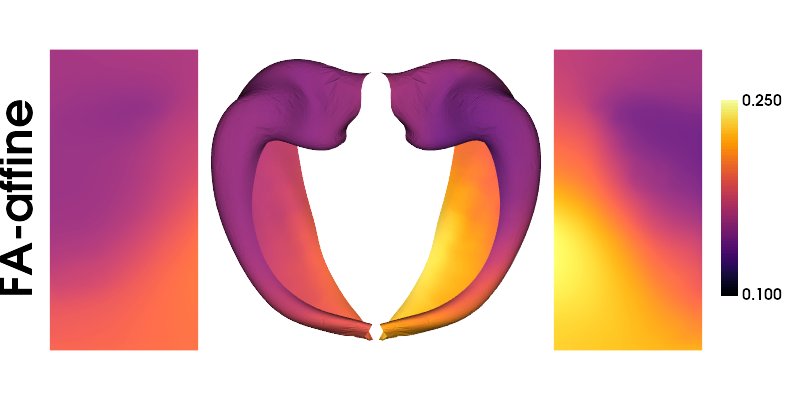

In [36]:
plot_hipp('surfaces_affine', 'FA', 'FA-affine', smt='_10mm', Range=(0.1, 0.25))

# FA affine mapping (old) 10mm smoothing

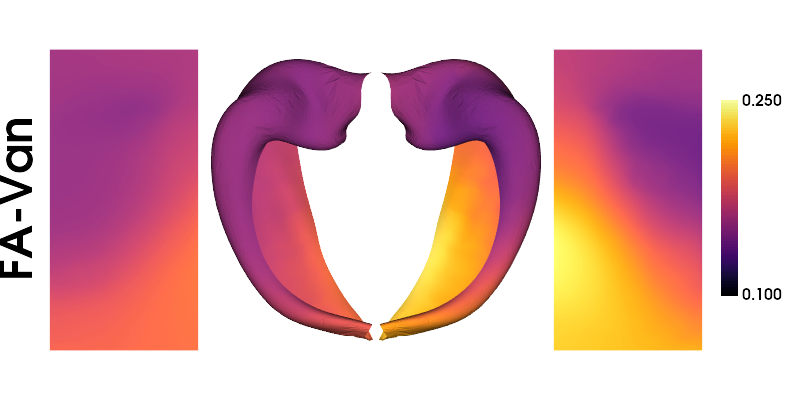

In [3]:
plot_hipp('surfaces_OLD', 'FA', 'FA-Van', Range=(0.1, 0.25))

# FA SyN mapping 10mm smoothing

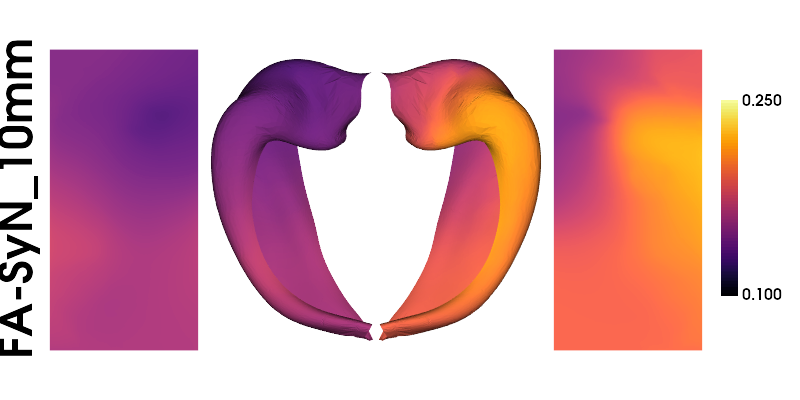

In [4]:
plot_hipp('surfaces', 'FA', 'FA-SyN_10mm', smt='_10mm', Range=(0.1,0.25))

# FA SyN no smoothing

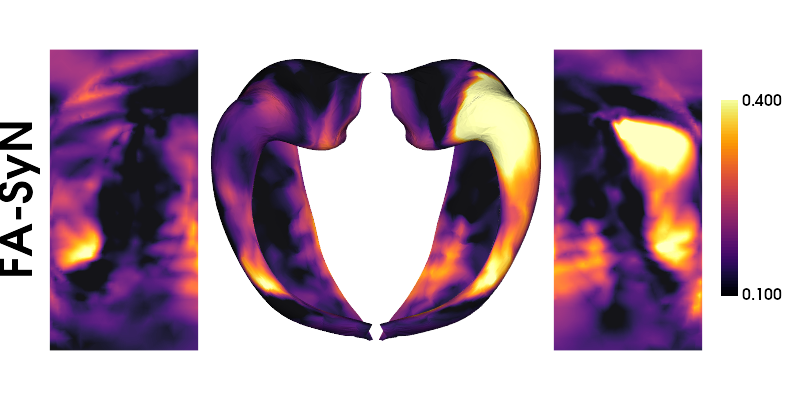

In [5]:
plot_hipp('surfaces', 'FA', 'FA-SyN', smt='', Range=(0.1,0.4))

# FA SyN mapping 2mm smoothing

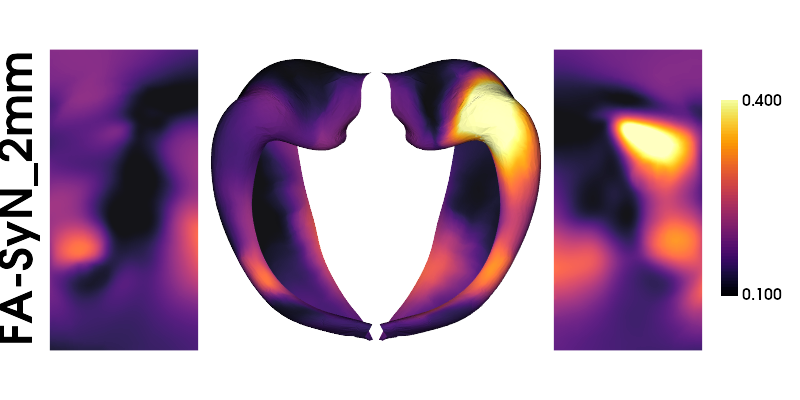

In [6]:
plot_hipp('surfaces', 'FA', 'FA-SyN_2mm', smt='_2mm', Range=(0.1,0.4))

# FA SyN mapping 3mm smoothing

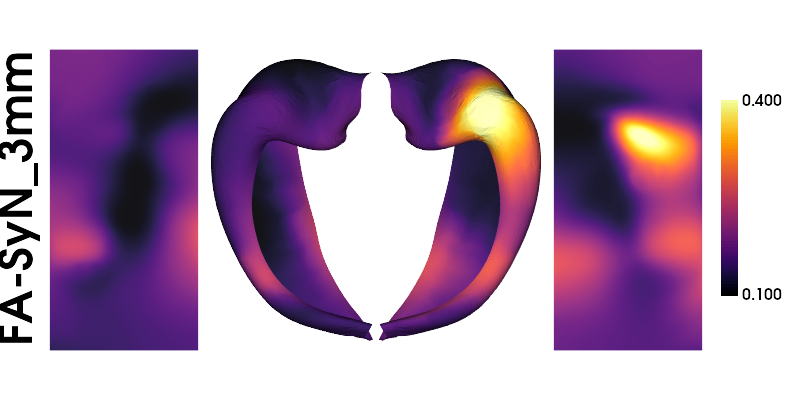

In [7]:
plot_hipp('surfaces', 'FA', 'FA-SyN_3mm', smt='_3mm', Range=(0.1,0.4))

# FA SyN mapping 5mm smoothing

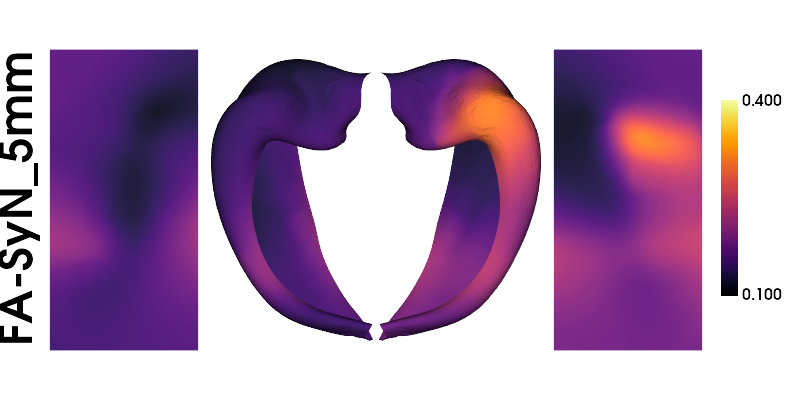

In [8]:
plot_hipp('surfaces', 'FA', 'FA-SyN_5mm', smt='_5mm', Range=(0.1,0.4))

# ADC affine mapping (old) 10mm smoothing

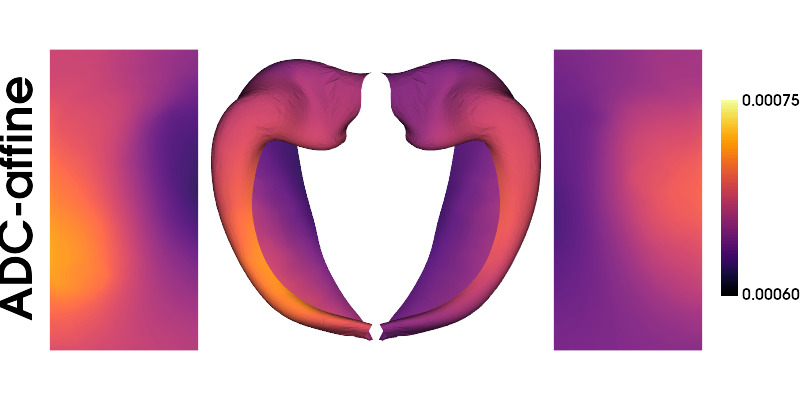

In [9]:
plot_hipp('surfaces_OLD', 'ADC', 'ADC-affine', smt='_10mm', Range=(0.0006, 0.00075))

# ADC SyN mapping 10mm smoothing

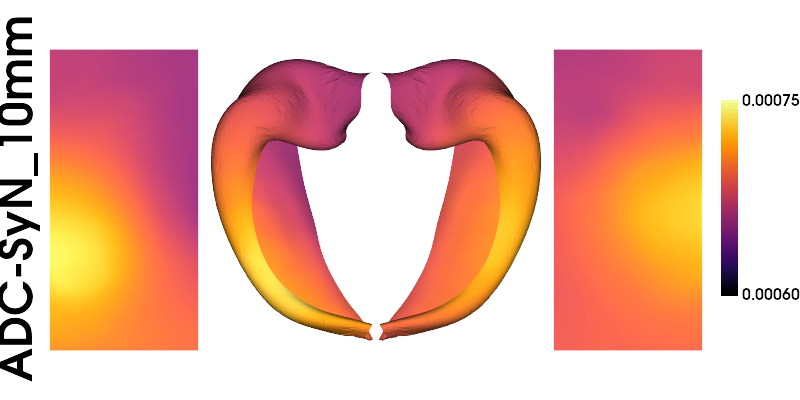

In [10]:
plot_hipp('surfaces', 'ADC', 'ADC-SyN_10mm', smt='_10mm', Range=(0.0006, 0.00075))

# ADC SyN mapping NO smoothing

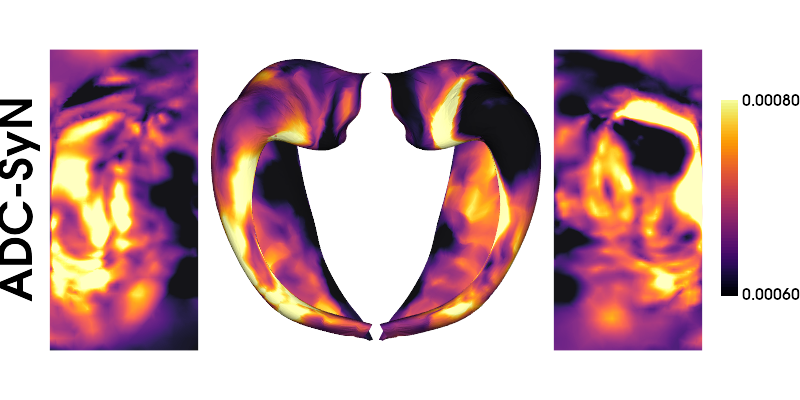

In [11]:
plot_hipp('surfaces', 'ADC', 'ADC-SyN', smt='', Range=(0.0006, 0.0008))

# ADC SyN mapping 2mm smoothing

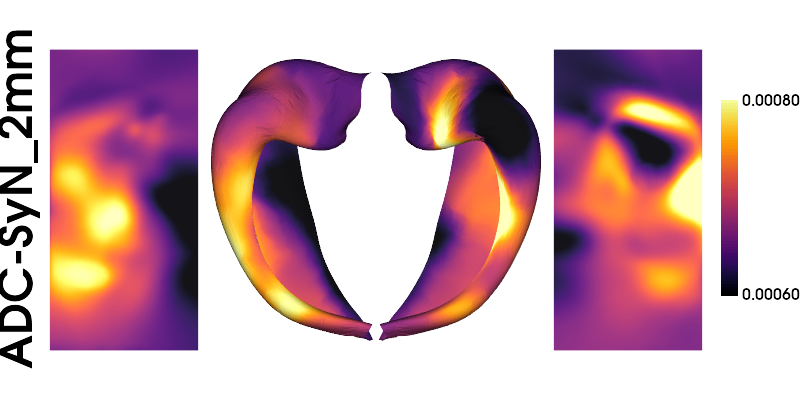

In [12]:
plot_hipp('surfaces', 'ADC', 'ADC-SyN_2mm', smt='_2mm', Range=(0.0006, 0.0008))

# ADC SyN mapping 3mm smoothing

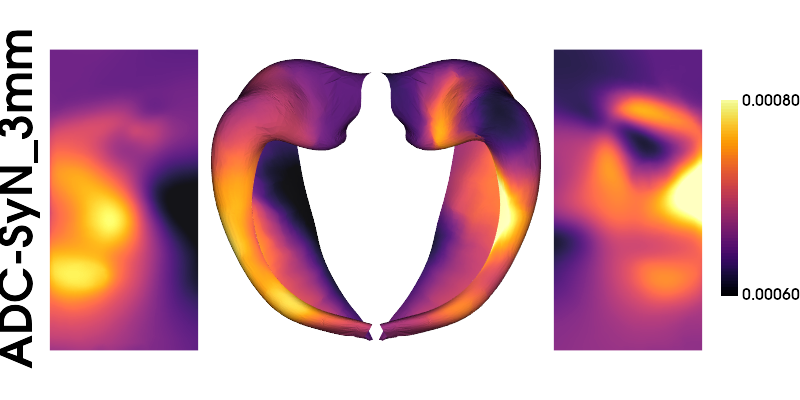

In [13]:
plot_hipp('surfaces', 'ADC', 'ADC-SyN_3mm', smt='_3mm', Range=(0.0006, 0.0008))

# ADC SyN mapping 5mm smoothing

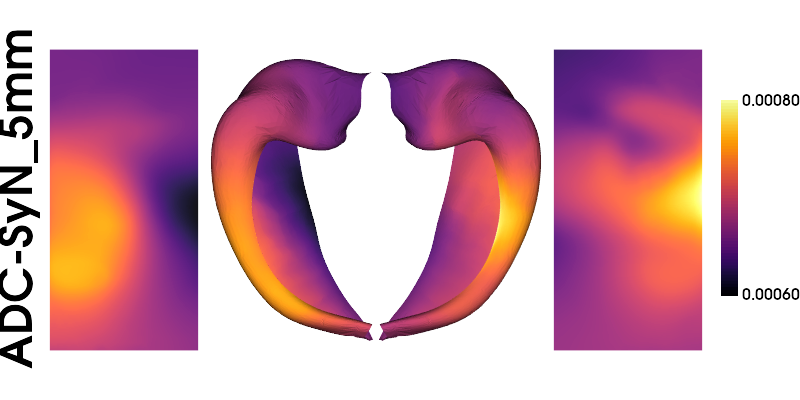

In [14]:
plot_hipp('surfaces', 'ADC', 'ADC-SyN_5mm', smt='_5mm', Range=(0.0006, 0.0008))

# ADC SyN mapping 10mm smoothing

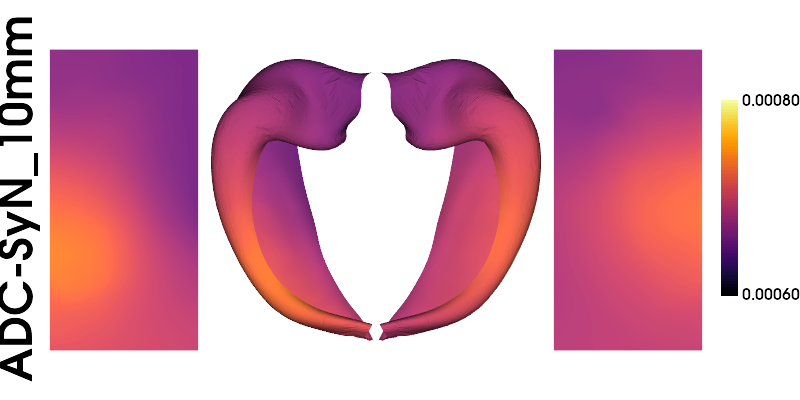

In [15]:
plot_hipp('surfaces', 'ADC', 'ADC-SyN_10mm', smt='_10mm', Range=(0.0006, 0.0008))

# Cortical mapping

In [26]:
def plot_ctx(surf_dir='surfaces', dti='FA', Title='', Range=(0.1, 0.45)):
    workdir='/data_/mica3/BIDS_MICs/derivatives/micapipe/sub-PX079/ses-01/dwi/'
    ctx_lh_file=workdir+surf_dir+'/'+ID+'_space-conte69-32k_desc-lh_model-DTI_map-'+dti+'.mgh'
    ctx_rh_file=workdir+surf_dir+'/'+ID+'_space-conte69-32k_desc-rh_model-DTI_map-'+dti+'.mgh'

    # Load all the thickness data
    ctx=np.hstack(np.concatenate((np.array(load(ctx_lh_file).get_fdata()), 
                                  np.array(load(ctx_rh_file).get_fdata())), axis=0))
    
    # Plot the mean thickness 10mm on conte69 surface
    print('min intensity:', np.min(ctx*mask))
    print('max intensity:', np.max(ctx*mask))
    p=plot_hemispheres(inf_lh, inf_rh, array_name=ctx*mask, cmap='inferno', nan_color=(0, 0, 0, 1),
                          zoom=1.3, size=(1000, 300), embed_nb=True,
                          color_bar='right', layout_style='row', color_range=Range,
                          label_text={'left': [Title]},interactive=False,
                          screenshot=False, filename='/home/bic/rcruces/Desktop/'+ID+'_'+dti+'.png')
    return(p)

# FA cortical maps

min intensity: 0.0
max intensity: 0.6982730031013489


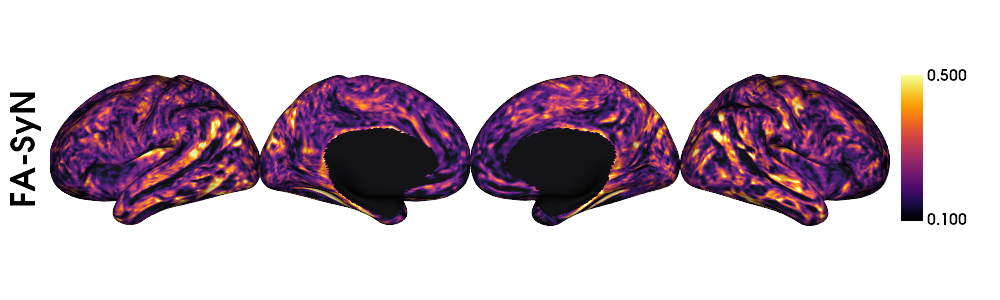

In [41]:
plot_ctx('surfaces', 'FA', 'FA-SyN', Range=(0.1, 0.5))

min intensity: 0.0
max intensity: 0.7590249180793762


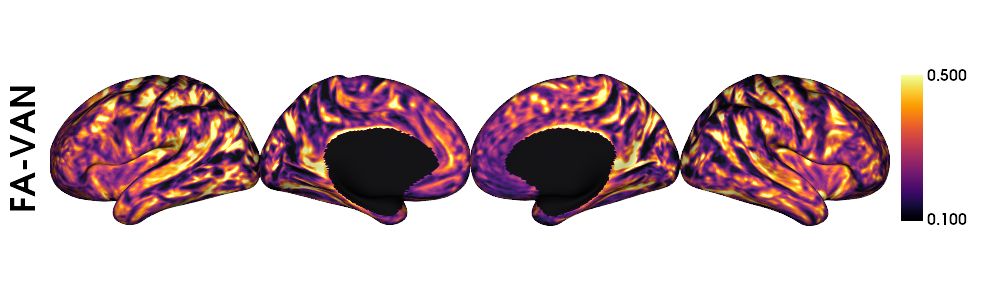

In [32]:
plot_ctx('surfaces_OLD', 'FA', 'FA-VAN', Range=(0.1, 0.5))

min intensity: 0.0
max intensity: 0.7115091681480408


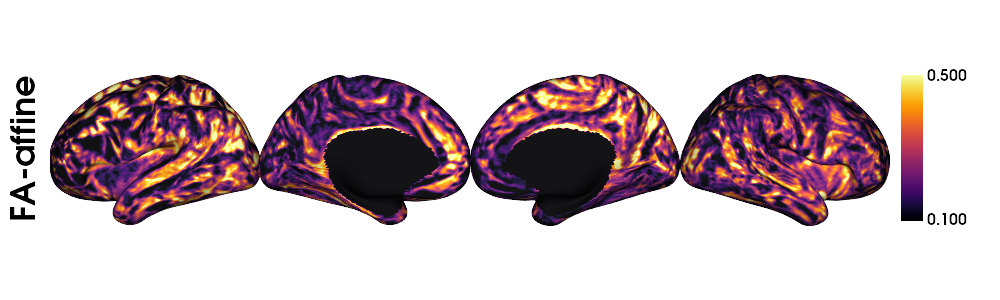

In [42]:
plot_ctx('surfaces_affine', 'FA', 'FA-affine', Range=(0.1, 0.5))

### UBC-van transformations
```bash
d2nxfm=$(find ${dir_warp}/${idBIDS}_space-dwi_from-dwi_to-nativepro_mode-image_desc-*0GenericAffine.mat)

antsApplyTransforms -d 3 -e 3 -i ${dti_FA/.mif/}.nii.gz \
    -r "${dir_freesurfer}/mri/T1.mgz" \
    -t ${d2nxfm} \
    -t ["${dir_warp}/${idBIDS}_from-fsnative_to_nativepro_t1w_0GenericAffine.mat",1] \
    -o "${proc_dwi}/${idBIDS}_space-fsspace_model-DTI_map-FA.nii.gz" \
    -v -u float --float

```

### Updated transformations 
```bash
Info "Transformation is ${mode}"
if [[ ${mode}  == "SyN" ]]; then
  trans_T12dwi="-t ${dwi_SyN_warp} -t ${dwi_SyN_affine} -t [${mat_dwi_affine},1]" # T1nativepro to DWI
  trans_dwi2T1="-t ${mat_dwi_affine} -t [${dwi_SyN_affine},1] -t ${dwi_SyN_Invwarp}"  # DWI to T1nativepro
elif [[ ${mode}  == "Affine" ]]; then
  trans_T12dwi="-t [${mat_dwi_affine},1]" # T1nativepro to DWI
  trans_dwi2T1="-t ${mat_dwi_affine}" # DWI to T1nativepro
fi

antsApplyTransforms -d 3 -i "${input}" \
    -r "$T1fsnative_brain" \
    -t ["${dir_warp}/${idBIDS}_from-fsnative_to_nativepro_t1w_0GenericAffine.mat",1] \
    "$trans_dwi2T1" \
    -n NearestNeighbor \
    -o "$output" -v
```

### antsApplyTransforms
Aplies the transformations from the last to the first

# ADC cortical maps

min intensity: 0.0
max intensity: 0.0010480001801624894


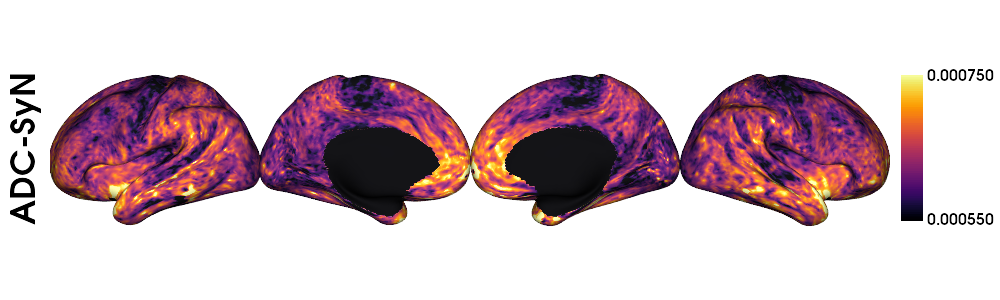

In [43]:
plot_ctx('surfaces', 'ADC', 'ADC-SyN', Range=(0.00055, 0.00075))

min intensity: 0.0
max intensity: 0.00132949894759804


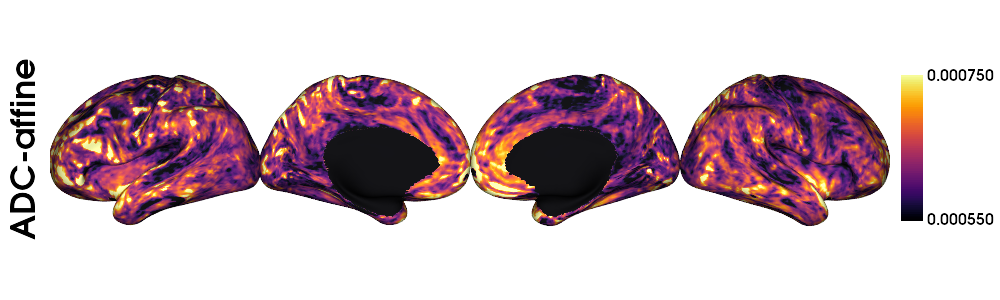

In [44]:
plot_ctx('surfaces_affine', 'ADC', 'ADC-affine', Range=(0.00055, 0.00075))

min intensity: 0.0
max intensity: 0.0016031083650887012


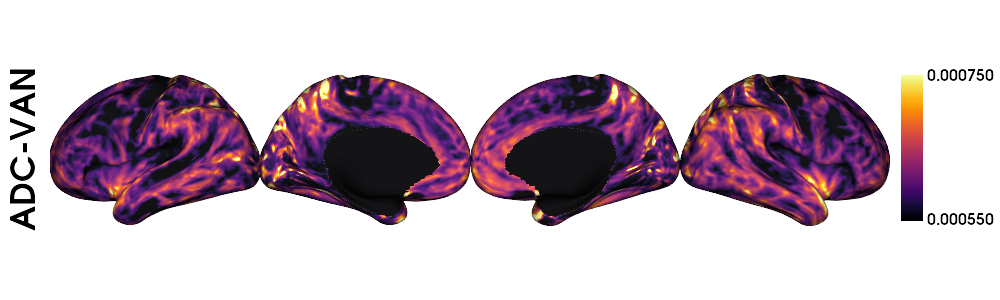

In [46]:
plot_ctx('surfaces_OLD', 'ADC', 'ADC-VAN', Range=(0.00055, 0.00075))